In [239]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib 
import streamlit


In [240]:
df1=pd.read_csv("testset.csv")
df=df1.copy()

In [241]:
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [242]:
df.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [243]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [244]:
df.rename(columns={" _conds":"conditions"," _dewptm":"dew_temp"," _fog":"fog"," _hail":"balls_of_ice "," _tempm":"temp_metrics"," _hum":"humidity"," _pressurem":"atm_pressure ",
" _rain":"rain"," _snow":"snow"," _tempm":"temp"," _thunder":" tornado"," _wdire":"wind_direction"},inplace=True)

In [245]:
df

,datetime_utc,conditions,dew_temp,fog,balls_of_ice,_heatindexm,humidity,_precipm,atm_pressure,rain,snow,temp,tornado,_tornado,_vism,_wdird,wind_direction,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [246]:
df.columns

Index(['datetime_utc', 'conditions', 'dew_temp', 'fog', 'balls_of_ice ',
       ' _heatindexm', 'humidity', ' _precipm', 'atm_pressure ', 'rain',
       'snow', 'temp', ' tornado', ' _tornado', ' _vism', ' _wdird',
       'wind_direction', ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [247]:
df

,datetime_utc,conditions,dew_temp,fog,balls_of_ice,_heatindexm,humidity,_precipm,atm_pressure,rain,snow,temp,tornado,_tornado,_vism,_wdird,wind_direction,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [248]:
# Strip any whitespace from the column names
df.columns = df.columns.str.strip()


In [249]:
df.drop(columns=["datetime_utc", "_heatindexm", "_precipm", "_tornado", "_vism", "_wdird", "_wgustm", "_windchillm", "_wspdm"], inplace=True)


In [250]:
df

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,rain,snow,temp,tornado,wind_direction
0,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,West
1,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,North
2,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,North
3,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,North
4,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,North
...,...,...,...,...,...,...,...,...,...,...,...
100985,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,NW
100986,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,NW
100987,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,West
100988,Haze,15.0,0,0,27.0,1004.0,0,0,32.0,0,NW


In [251]:
df.columns

Index(['conditions', 'dew_temp', 'fog', 'balls_of_ice', 'humidity',
       'atm_pressure', 'rain', 'snow', 'temp', 'tornado', 'wind_direction'],
      dtype='object')

In [252]:
df.isna().sum()

conditions           72
dew_temp            621
fog                   0
balls_of_ice          0
humidity            757
atm_pressure        232
rain                  0
snow                  0
temp                673
tornado               0
wind_direction    14755
dtype: int64

In [253]:
df["rain"].value_counts()

rain
0    98338
1     2652
Name: count, dtype: int64

In [254]:
df.columns

Index(['conditions', 'dew_temp', 'fog', 'balls_of_ice', 'humidity',
       'atm_pressure', 'rain', 'snow', 'temp', 'tornado', 'wind_direction'],
      dtype='object')

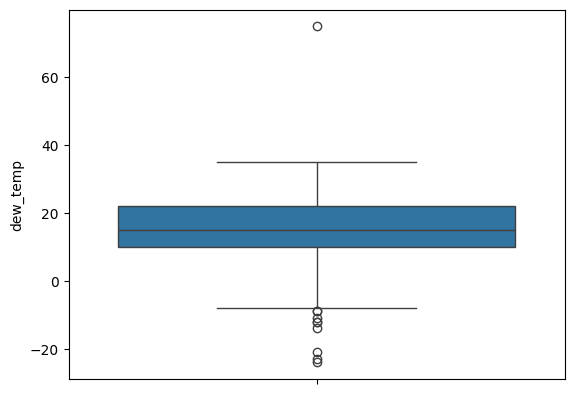

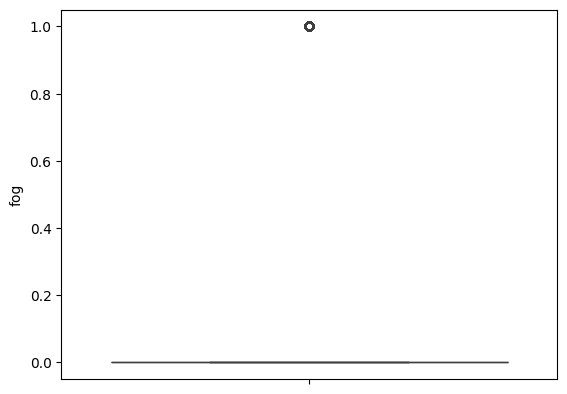

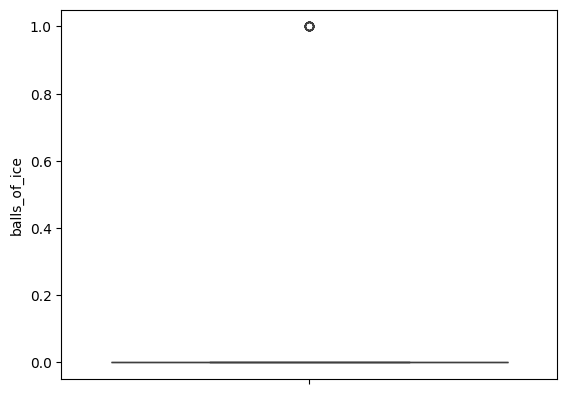

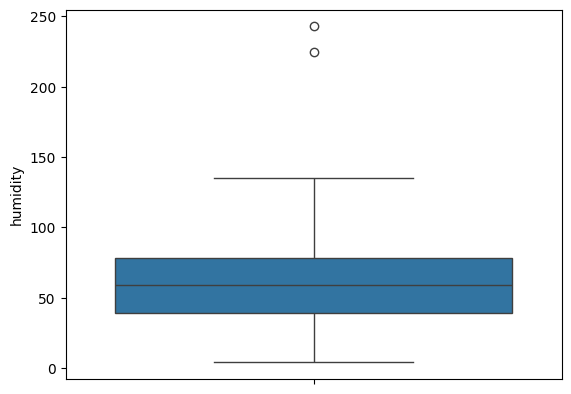

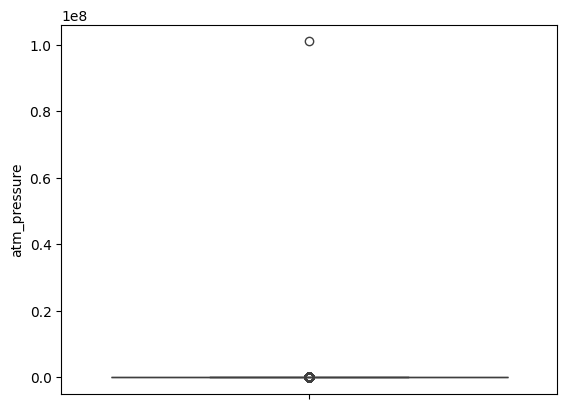

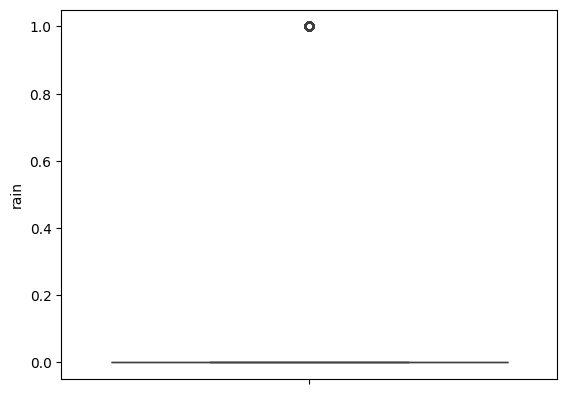

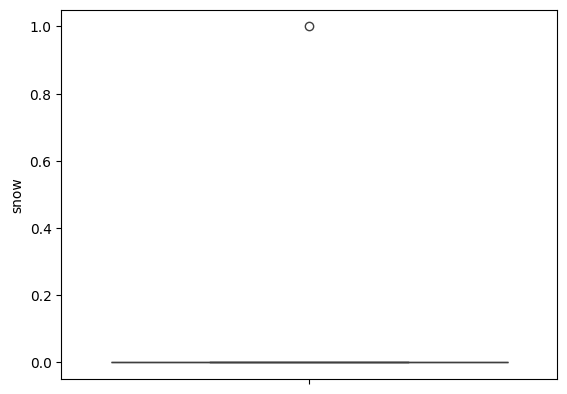

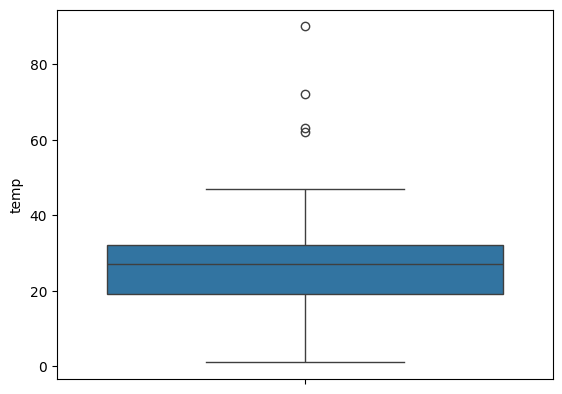

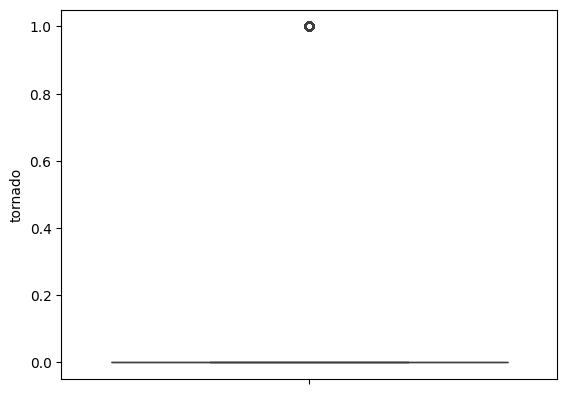

In [255]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(df[i])
  
  plt.show()

In [256]:
df

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,rain,snow,temp,tornado,wind_direction
0,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,West
1,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,North
2,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,North
3,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,North
4,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,North
...,...,...,...,...,...,...,...,...,...,...,...
100985,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,NW
100986,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,NW
100987,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,West
100988,Haze,15.0,0,0,27.0,1004.0,0,0,32.0,0,NW


In [257]:
df.isna().sum()

conditions           72
dew_temp            621
fog                   0
balls_of_ice          0
humidity            757
atm_pressure        232
rain                  0
snow                  0
temp                673
tornado               0
wind_direction    14755
dtype: int64

In [258]:
%%capture
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Numerical columns
        df[col].fillna(df[col].median(), inplace=True)
    else:  # Categorical columns (object or string data type)
        df[col].fillna(df[col].mode()[0], inplace=True)


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   conditions      100990 non-null  object 
 1   dew_temp        100990 non-null  float64
 2   fog             100990 non-null  int64  
 3   balls_of_ice    100990 non-null  int64  
 4   humidity        100990 non-null  float64
 5   atm_pressure    100990 non-null  float64
 6   rain            100990 non-null  int64  
 7   snow            100990 non-null  int64  
 8   temp            100990 non-null  float64
 9   tornado         100990 non-null  int64  
 10  wind_direction  100990 non-null  object 
dtypes: float64(4), int64(5), object(2)
memory usage: 8.5+ MB


In [260]:
df.isna().sum()

conditions        0
dew_temp          0
fog               0
balls_of_ice      0
humidity          0
atm_pressure      0
rain              0
snow              0
temp              0
tornado           0
wind_direction    0
dtype: int64

In [261]:

from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for i in df.select_dtypes(include="object").columns:
  df[i]=lr.fit_transform(df[i])

In [262]:
df['rain'].value_counts()

rain
0    98338
1     2652
Name: count, dtype: int64

In [263]:
def out(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  uw=q1-1.5*iqr
  lw=q3+1.5*iqr
  return uw,lw

In [264]:
list1=["humidity","dew_temp","atm_pressure","temp"]
for i in list1:
  lw,uw=out(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

In [265]:
df['rain'].value_counts()

rain
0    98338
1     2652
Name: count, dtype: int64

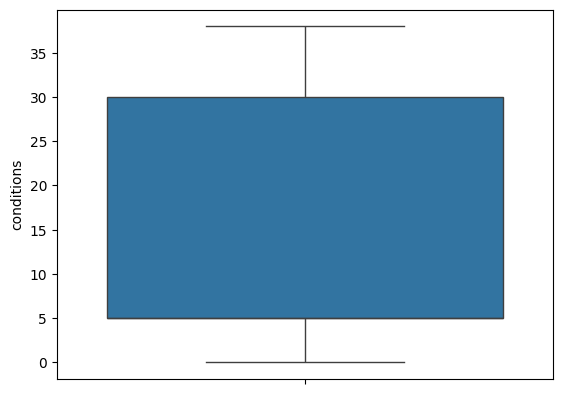

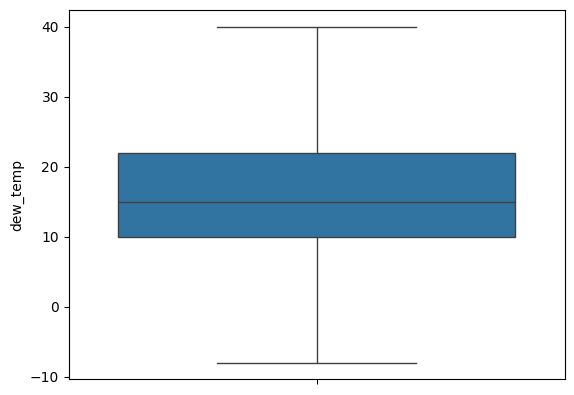

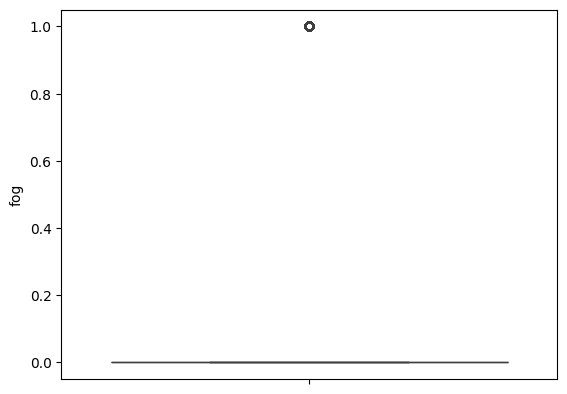

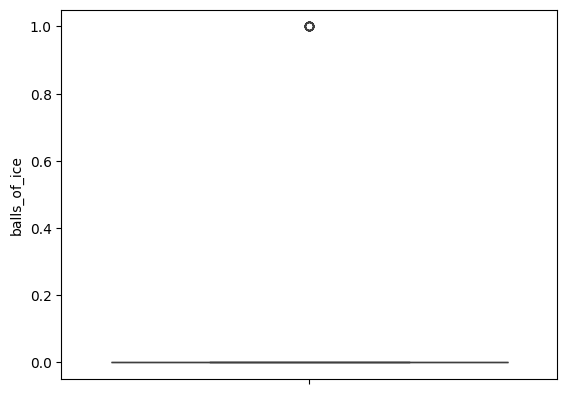

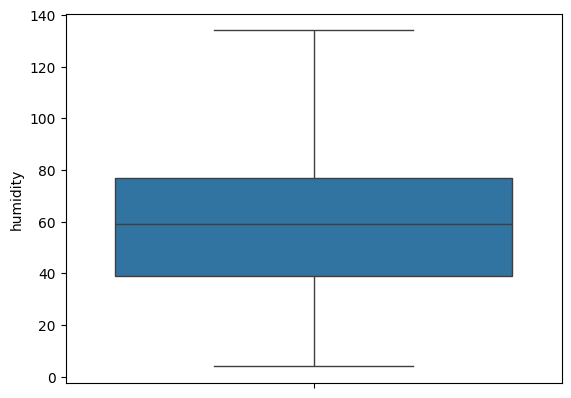

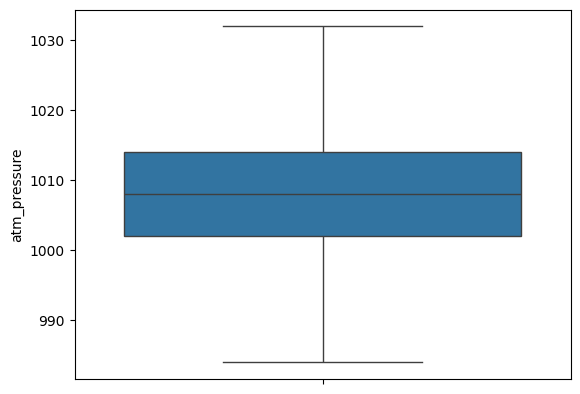

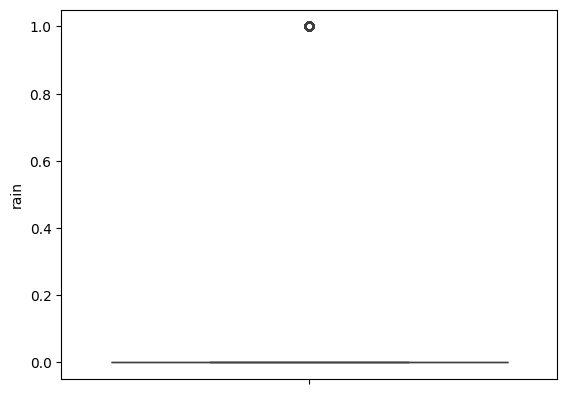

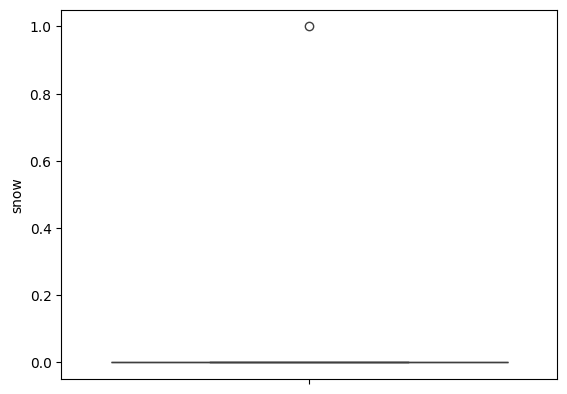

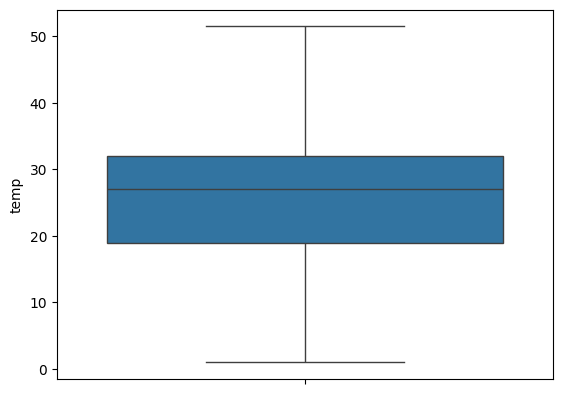

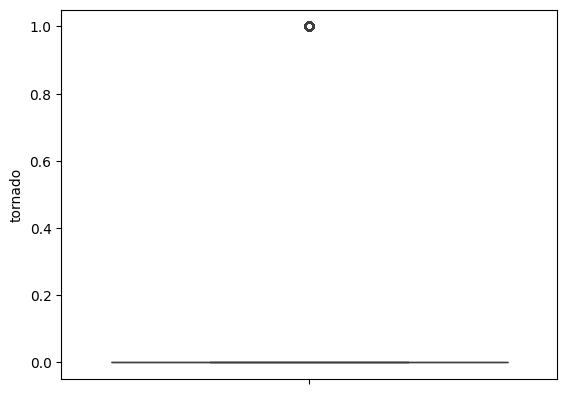

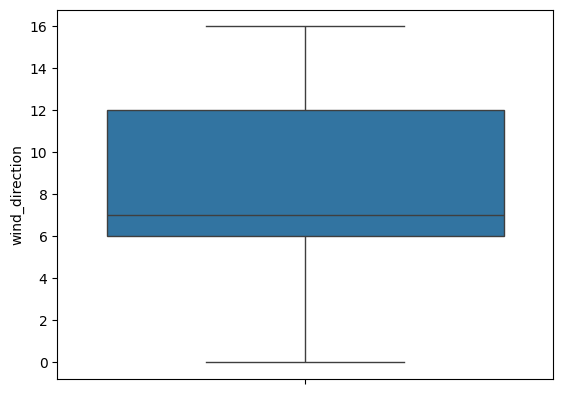

In [266]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(df[i])
  plt.show()

In [267]:
df.isna().sum()

conditions        0
dew_temp          0
fog               0
balls_of_ice      0
humidity          0
atm_pressure      0
rain              0
snow              0
temp              0
tornado           0
wind_direction    0
dtype: int64

In [268]:
df["rain"].value_counts()

rain
0    98338
1     2652
Name: count, dtype: int64

In [269]:
df

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,rain,snow,temp,tornado,wind_direction
0,31,9.0,0,0,27.0,1010.0,0,0,30.0,0,16
1,31,10.0,0,0,32.0,984.0,0,0,28.0,0,7
2,31,11.0,0,0,44.0,984.0,0,0,24.0,0,7
3,31,10.0,0,0,41.0,1010.0,0,0,24.0,0,7
4,31,11.0,0,0,47.0,1011.0,0,0,23.0,0,7
...,...,...,...,...,...,...,...,...,...,...,...
100985,5,17.0,0,0,25.0,1005.0,0,0,34.0,0,6
100986,5,14.0,0,0,16.0,1003.0,0,0,38.0,0,6
100987,5,12.0,0,0,14.0,1002.0,0,0,36.0,0,16
100988,5,15.0,0,0,27.0,1004.0,0,0,32.0,0,6


In [270]:
df.columns

Index(['conditions', 'dew_temp', 'fog', 'balls_of_ice', 'humidity',
       'atm_pressure', 'rain', 'snow', 'temp', 'tornado', 'wind_direction'],
      dtype='object')

In [271]:
# now split the data
x=df.drop(columns="rain")
y=df["rain"]

In [272]:
y.value_counts()

rain
0    98338
1     2652
Name: count, dtype: int64

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


In [274]:
x_train

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,snow,temp,tornado,wind_direction
72250,15,28.0,0,0,80.0,992.0,0,31.0,0,10
70158,20,26.0,0,0,85.0,1004.0,0,28.0,0,7
75648,5,24.0,0,0,41.0,1000.0,0,35.0,0,6
91231,5,22.0,0,0,56.0,1006.0,0,29.0,0,14
52856,5,9.0,0,0,63.0,1017.0,0,16.0,0,14
...,...,...,...,...,...,...,...,...,...,...
6265,5,26.0,0,0,79.0,1005.0,0,30.0,0,7
54886,24,14.0,0,0,88.0,1018.0,0,16.0,0,14
76820,23,9.0,1,0,97.0,1019.0,0,9.0,0,7
860,31,1.0,0,0,66.0,1017.0,0,7.0,0,7


In [275]:
y_train

72250    1
70158    0
75648    0
91231    0
52856    0
        ..
6265     0
54886    0
76820    0
860      0
15795    0
Name: rain, Length: 80792, dtype: int64

In [276]:
y_train.value_counts()

rain
0    78647
1     2145
Name: count, dtype: int64

In [277]:
# now inport model name from sklearn
from sklearn.linear_model import LogisticRegression
li = LogisticRegression()
li.fit(x_train, y_train)


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [278]:
x_train

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,snow,temp,tornado,wind_direction
72250,15,28.0,0,0,80.0,992.0,0,31.0,0,10
70158,20,26.0,0,0,85.0,1004.0,0,28.0,0,7
75648,5,24.0,0,0,41.0,1000.0,0,35.0,0,6
91231,5,22.0,0,0,56.0,1006.0,0,29.0,0,14
52856,5,9.0,0,0,63.0,1017.0,0,16.0,0,14
...,...,...,...,...,...,...,...,...,...,...
6265,5,26.0,0,0,79.0,1005.0,0,30.0,0,7
54886,24,14.0,0,0,88.0,1018.0,0,16.0,0,14
76820,23,9.0,1,0,97.0,1019.0,0,9.0,0,7
860,31,1.0,0,0,66.0,1017.0,0,7.0,0,7


In [279]:
y_pred=li.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [280]:
ac=accuracy_score(y_test,y_pred)
print(ac)
ps=precision_score(y_test,y_pred)
print(ps)
f1=f1_score(y_test,y_pred)
print(f1)
rc=recall_score(y_test,y_pred)
print(rc)


0.9782156649173186
0.7410071942446043
0.3188854489164087
0.20315581854043394


In [281]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)


In [282]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [283]:
ac1=accuracy_score(y_test,y_pred1)
print(ac1)
ps1=precision_score(y_test,y_pred1)
print(ps1)
f2=f1_score(y_test,y_pred1)
print(f2)
rc1=recall_score(y_test,y_pred1)
print(rc1)


0.9899990098029507
0.8981723237597912
0.7730337078651686
0.6785009861932939


In [284]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()
rd.fit(x_train,y_train)
y_pred2=rd.predict(x_test)


In [285]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [286]:
ac2=accuracy_score(y_test,y_pred2)
print(ac2)
ps2=precision_score(y_test,y_pred2)
print(ps2)
f3=f1_score(y_test,y_pred2)
print(f3)
rc2=recall_score(y_test,y_pred2)
print(rc2)


0.9979700960491138
0.9678714859437751
0.9592039800995025
0.9506903353057199


In [287]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred3=xg.predict(x_test)

In [288]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [289]:
ac4=accuracy_score(y_test,y_pred3)
print(ac4)
ps4=precision_score(y_test,y_pred3)
print(ps4)
f11=f1_score(y_test,y_pred3)
print(f11)
rc4=recall_score(y_test,y_pred3)
print(rc4)


0.9991088226557084
0.9803536345776032
0.9822834645669292
0.9842209072978304


In [290]:
#treee
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preda=dt.predict(x_test)

In [291]:
y_preda

array([0, 0, 0, ..., 0, 0, 0])

In [292]:
a=accuracy_score(y_test,y_preda)
print(a)
p=precision_score(y_test,y_preda)
print(p)
f=f1_score(y_test,y_preda)
print(f)
r=recall_score(y_test,y_preda)
print(r)


0.9989602930983266
0.9727626459143969
0.9794319294809011
0.9861932938856016


In [293]:
import joblib
joblib.dump(xg,"rain_xgb.pkl")

['rain_xgb.pkl']